# Evaluación de modelos


Por defecto, en scikit-learn, se utiliza el ``accuracy`` para clasificación, que es el ratio de patrones correctamente clasificados y el $R^2$ para regresión, que es el coeficiente de determinación.
Estas medidas son razonables para muchos escenarios. Sin embargo, dependiendo de la tarea que estemos tratando, estas no tienen porque ser las mejores opciones (y a veces pueden ser opciones muy poco recomendables).
Vamos a centrarnos en la tarea de clasificación, volviendo de nuevo al problema de clasificación de dígitos manuscritos. Scikit-learn tiene métodos muy útiles en el paquete ``sklearn.metrics`` para ayudarnos a entrenar un clasificador y luego evaluarlo de distintas formas:

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2)

In [54]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=1,
                                                    stratify=y,
                                                    test_size=0.25)

classifier = LinearSVC(random_state=1).fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

print("CCR: %f"%(classifier.score(X_test, y_test)))

CCR: 0.948889


/Users/ladino/opt/anaconda3/envs/Dashboard/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Vemos que hemos predicho alrededor de un 95% de patrones de forma correcta. Para problemas multi-clase, a veces es muy útil saber qué clases son más difíciles de predecir y cuáles más fáciles o incluso qué tipo de errores son los más comunes. Una forma de tener más información en este sentido es la **matriz de confusión**, que muestra para cada clase (filas) cuántas veces se predicen qué clases (columnas).

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[44,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  1,  0,  2,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 42,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 43,  1,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 44,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 42,  1,  0],
       [ 0,  4,  0,  1,  0,  0,  0,  0, 37,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 43]])

A veces un gráfico es más fácil de leer:

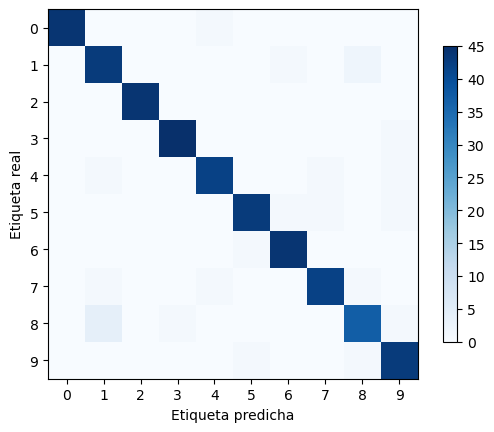

In [56]:
plt.imshow(confusion_matrix(y_test, y_test_pred), cmap="Blues")
plt.colorbar(shrink=0.8)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real");

Matriz de confusión, sin normalización.
[[44  0  0  0  1  0  0  0  0  0]
 [ 0 43  0  0  0  0  1  0  2  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  1]
 [ 0  1  0  0 42  0  0  1  0  1]
 [ 0  0  0  0  0 43  1  1  0  1]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  1  0  0  1  0  0 42  1  0]
 [ 0  4  0  1  0  0  0  0 37  1]
 [ 0  0  0  0  0  1  0  0  1 43]]
Matriz de confusión normalizada
[[0.98 0.   0.   0.   0.02 0.   0.   0.   0.   0.  ]
 [0.   0.93 0.   0.   0.   0.   0.02 0.   0.04 0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.98 0.   0.   0.   0.   0.   0.02]
 [0.   0.02 0.   0.   0.93 0.   0.   0.02 0.   0.02]
 [0.   0.   0.   0.   0.   0.93 0.02 0.02 0.   0.02]
 [0.   0.   0.   0.   0.   0.02 0.98 0.   0.   0.  ]
 [0.   0.02 0.   0.   0.02 0.   0.   0.93 0.02 0.  ]
 [0.   0.09 0.   0.02 0.   0.   0.   0.   0.86 0.02]
 [0.   0.   0.   0.   0.   0.02 0.   0.   0.02 0.96]]


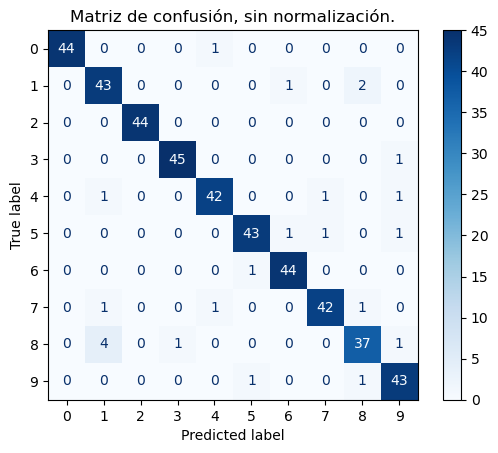

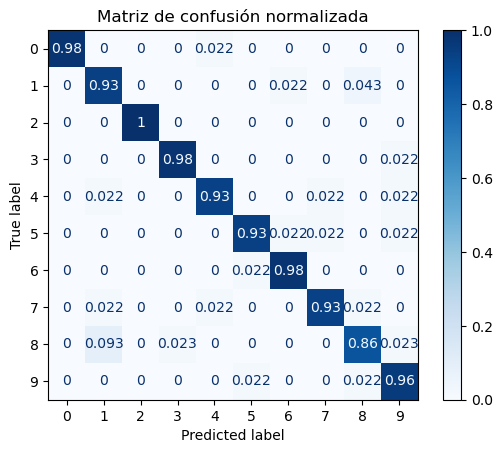

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized confusion matrix
titles_options = [
    ("Matriz de confusión, sin normalización.", None),
    ("Matriz de confusión normalizada", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels= digits.target_names,
    
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [37]:
digits.target_names


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Podemos ver que la mayoría de valores están en la diagonal principal, lo que significa que predecimos casi todos los ejemplos correctamente. Las entradas que no están en la diagonal principal nos muestran que hay bastantes ochos clasificados como unos, y que los nueves son fácilmente confundibles con el resto de clases.

Otra función muy útil es ``classification_report`` que nos proporciona los valores de precisión, recall, puntuación f y el soporte para todas las clases. La precisión nos dice cuantas de las predicciones de una clase, son realmente de esa clase. Sea TP, FP, TN, FN "true positive" (verdaderos positivos), "false positive", (falsos positivos),"true negative" (verdaderos negativos) y "false negative" (falsos negativos), respectivamente:

Precision = TP / (TP + FP)

El recall representa cuantos ejemplos de la clase fueron clasificados correctamente (accuracy considerando solo esa clase):

Recall = TP / (TP + FN)

El valor F1 es la media geométrica de la precisión y el recall:

F1 = 2 x (precision x recall) / (precision + recall)

Todas estas métricas están en el intervalo $[0,1]$, donde un 1 es una puntuación perfecta.

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.88      0.93      0.91        46
           2       1.00      1.00      1.00        44
           3       0.98      0.98      0.98        46
           4       0.95      0.93      0.94        45
           5       0.96      0.93      0.95        46
           6       0.96      0.98      0.97        45
           7       0.95      0.93      0.94        45
           8       0.90      0.86      0.88        43
           9       0.91      0.96      0.93        45

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



Estas métricas son especialmente útiles en dos casos particulares:
1. Clasificación no balanceada, es decir, una o varias clases son mucho menos frecuentes (hay menos casos en el conjunto de entrenamiento) que el resto de clases.
2. Costes asimétricos, esto es, algunos tipos de errores son más "costosos" que el resto.

Vamos a ver el primer caso. Imagina que tenemos un ratio de 1:9 para un problema de clasificación (lo cuál no es muy exagerado, piensa por ejemplo en la predicción de clicks sobre banners de publicidad, donde a lo mejor solo un 0.001% de los anunciados son visitados):

In [9]:
np.bincount(y) / y.shape[0]

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

Para probar este escenario, vamos a clasificar el dígito 3 contra el resto (el problema de clasificación es un problema binario, ¿es este dígito un 3?):

In [10]:
X, y = digits.data, digits.target == 3

Ahora vamos a aplicar validación cruzada con un clasificador para ver que tal funciona:

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

cross_val_score(SVC(), X, y)

array([1.  , 0.96, 1.  , 1.  , 0.96])

Nuestro clasificador tienen un 90% de acierto siempre. ¿Es bueno o malo? Ten en cuenta que el 90% de los dígitos no son un 3. Vamos a ver que tal funciona un clasificador simple, que siempre predice la clase más frecuenta (ZeroR):

In [12]:
from sklearn.dummy import DummyClassifier
cross_val_score(DummyClassifier(strategy="most_frequent"), X, y)

array([0.9, 0.9, 0.9, 0.9, 0.9])

También un 90%, como esperábamos. Por tanto, podemos pensar que el clasificador SVC no es demasiado bueno, ya que funciona igual que una estrategia que ni si quiera mira los datos de entrada. De todas formas, esto sería sacar conclusiones muy rápido ya que, en general, el accuracy no es una buena medida de rendimiento para bases de datos no balanceadas.

In [13]:
np.bincount(y) / y.shape[0]

array([0.9, 0.1])

Curvas ROC
=======

Una medida mucho mejor se puede obtener utilizando las llamadas curvas de operación características (ROC, *Receiver operating characteristics*). Una curva ROC trabaja con las medidas de incertidumbre de un clasificador, por ejemplo la función de decisión de un ``SVC``. En lugar de utilizar el cero como umbral para distinguir ejemplos negativos de ejemplos positivos, la curva ROC considera todos los posibles umbrales y almacena el ratio de ejemplos de la clase positiva que se predicen correctamente (TPR) y el ratio de fallos para la clase negativa (FPR).


/Users/ladino/opt/anaconda3/envs/Dashboard/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ladino/opt/anaconda3/envs/Dashboard/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ladino/opt/anaconda3/envs/Dashboard/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ladino/opt/anaconda3/envs/Dashboard/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ladino/opt/anaconda3/envs/Dashboard/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


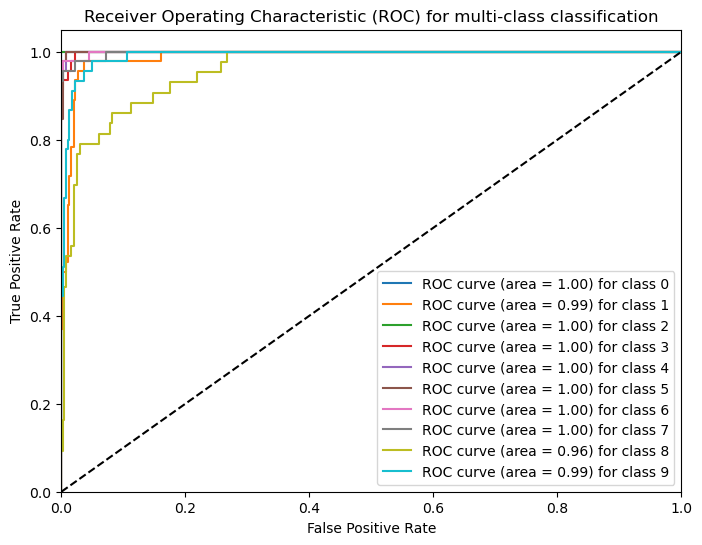

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc

# Cargar la base de datos de dígitos
digits = load_digits()
X = digits.data
y = digits.target

# Binarizar las etiquetas
y = label_binarize(y, classes=range(10))
n_classes = y.shape[1]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=1,
                                                    stratify=y,
                                                    test_size=0.25)


# Entrenar el clasificador
classifier = OneVsRestClassifier(LinearSVC(random_state=1)).fit(X_train, y_train)

# Calcular las puntuaciones de clase
y_score = classifier.decision_function(X_test)

# Calcular las curvas ROC y las áreas bajo las curvas ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar las curvas ROC
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class classification')
plt.legend(loc="lower right")
plt.show()


Si el valor de umbral es muy bajo, tendremos muchos falsos positivos y por tanto un TPR muy alto y un FPR muy alto (porque casi todo lo clasificamos como positivo). Si usamos un umbral muy alto, habrá muy pocos falsos positivos (casi todo se predice como negativo), y por tanto el TPR será bajo y el FPR también. Por lo que, en general, la curva va desde arriba a la derecha hasta abajo a la izquierda. Una línea diagonal indica que el rendimiento es aleatorio, mientras que el objetivo ideal sería que la curva se desplace arriba a la izquierda. Esto significa que el clasificador daría siempre valores más altos de la función de decisión a los ejemplos positivos que a los ejemplos negativos.

En este sentido, esta curva solo considera el orden asignado a los ejemplos positivos y negativos según la función de decisión, pero no el valor asignado. Como puedes ver a partir de las curvas y de los valores de accuracy, aunque todos los clasificadores tengan el mismo accuracy, uno de ellos tiene una curva ROC perfecta, mientras que otro se comporta igual que un clasificador aleatorio.

### Forma de la curva ROC:

1. Las curvas ROC típicamente muestran la tasa de verdaderos positivos (sensibilidad) en el eje y y la tasa de falsos positivos (especificidad) en el eje x.
2. Cuanto más cerca esté la curva ROC del vértice superior izquierdo del gráfico (0,1), mejor será el rendimiento del clasificador.
3. Una línea diagonal (es decir, la curva ROC para una clasificación aleatoria) tendría un AUC de alrededor de 0.5.

### Área bajo la curva (AUC):
1. AUC es una medida de la capacidad del modelo para discriminar entre las clases.
2. AUC de 1.0 indica un modelo perfecto que puede distinguir entre todas las clases perfectamente.
3. AUC de 0.5 sugiere que el modelo esencialmente hace predicciones aleatorias para esa clase.
4. Un AUC por encima de 0.5 pero por debajo de 1.0 indica que el modelo es mejor que el azar, pero puede haber margen de mejora.


### Comparación entre clases:

1. Puedes comparar las curvas ROC y las AUC entre diferentes clases para evaluar cómo el clasificador se desempeña para cada clase individualmente.
2. Las clases con curvas ROC que se acercan más al vértice superior izquierdo y tienen AUC más altas indican que el clasificador es mejor para distinguir esa clase en particular.

### Interpretación específica de la clase:
1. Si la curva ROC de una clase en particular está muy cerca del vértice superior izquierdo y tiene un AUC cercano a 1.0, indica que el clasificador tiene una alta sensibilidad y especificidad para esa clase, es decir, es capaz de identificar correctamente los miembros de esa clase y evitar clasificar incorrectamente instancias negativas como positivas.
2. Si la curva ROC de una clase se aleja del vértice superior izquierdo y tiene un AUC cercano a 0.5, sugiere que el clasificador tiene dificultades para distinguir esa clase y puede estar haciendo predicciones casi aleatorias para esa clase.